In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier 
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
df=pd.read_csv(r"C:\Users\Ahmed\Downloads\DATASETS\Car_purchasing\car_data.csv")

In [3]:
df

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0
...,...,...,...,...,...
995,863,Male,38,59000,0
996,800,Female,47,23500,0
997,407,Female,28,138500,1
998,299,Female,48,134000,1


In [4]:
df.isnull().sum()

User ID         0
Gender          0
Age             0
AnnualSalary    0
Purchased       0
dtype: int64

In [5]:
from sklearn.preprocessing import LabelEncoder

cols = ['Gender']
df['Gender_Enc'] = LabelEncoder().fit_transform(df['Gender'])
df[['Gender', 'Gender_Enc']].drop_duplicates()

,Gender,Gender_Enc
0,Male,1
5,Female,0


In [6]:
df.drop(columns='Gender', inplace=True)

In [21]:
# Define feature columns by dropping the target column
X = df.drop('Purchased', axis=1)
print(X)
# Define the target column
y = df['Purchased']
print(y)

     User ID  Age  AnnualSalary  Gender_Enc
0        385   35         20000           1
1        681   40         43500           1
2        353   49         74000           1
3        895   40        107500           1
4        661   25         79000           1
..       ...  ...           ...         ...
995      863   38         59000           1
996      800   47         23500           0
997      407   28        138500           0
998      299   48        134000           0
999      687   44         73500           0

[1000 rows x 4 columns]
0      0
1      0
2      0
3      1
4      0
      ..
995    0
996    0
997    1
998    1
999    0
Name: Purchased, Length: 1000, dtype: int64


In [53]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=101)

# Print the shapes of the resulting splits
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (800, 4)
Test set shape: (200, 4)


In [54]:
clf= DecisionTreeClassifier(max_depth=2, random_state=101)
clf.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=2, random_state=101)

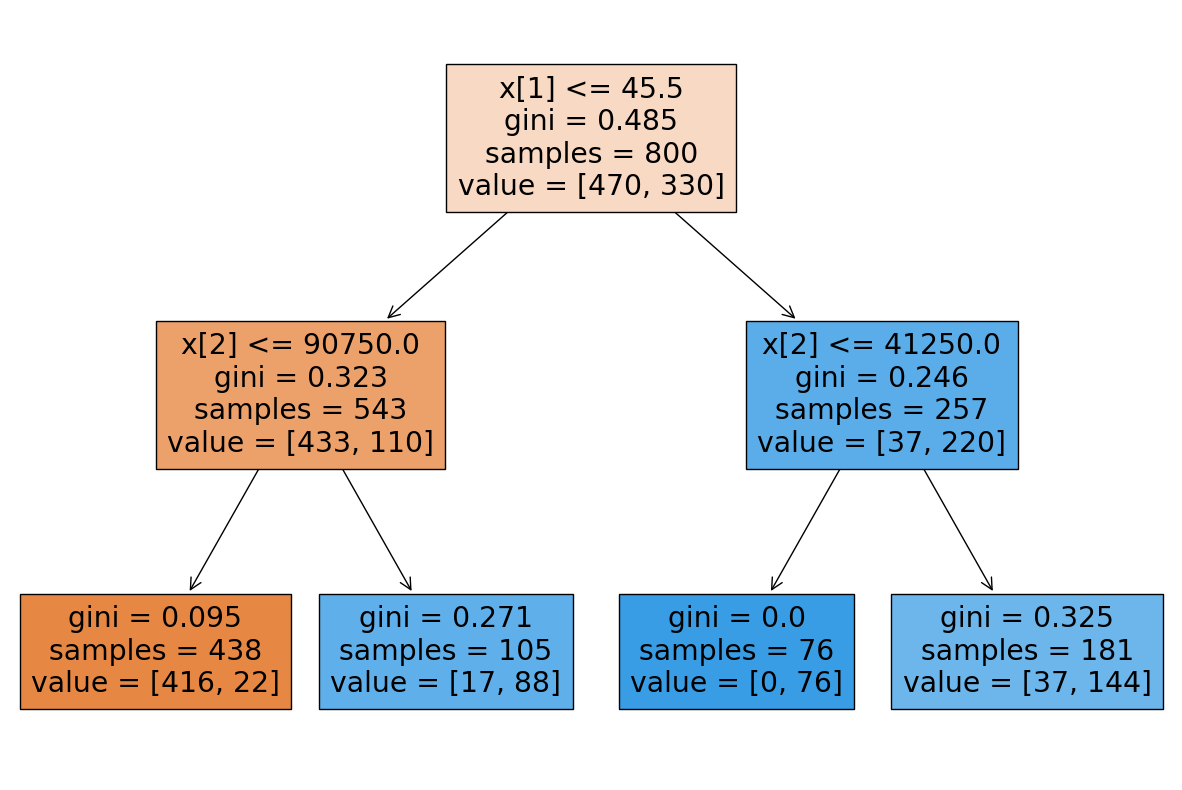

In [55]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(clf,filled=True)
plt.show()

In [56]:
y_pred=clf.predict(X_test)

In [57]:
accuracy= accuracy_score(Y_test,y_pred)
print(f"Accuracy: {accuracy: .2f}")

Accuracy:  0.90


In [13]:
sample = pd.DataFrame({
    'User ID': [863],
    'Age': [38],
    'AnnualSalary': [59000],
    'Gender_Enc': [1]
})

# Predict the class for the sample
predic_class = clf.predict(sample)
print(f"Predicted the target class for the sample: {predic_class[0]}")


Predicted the target class for the sample: 0


In [14]:
results_df = pd.DataFrame({
    'Actual': Y_test.values,
    'Predicted': y_pred
})

# Print column names to verify
print(results_df.columns)

Index(['Actual', 'Predicted'], dtype='object')


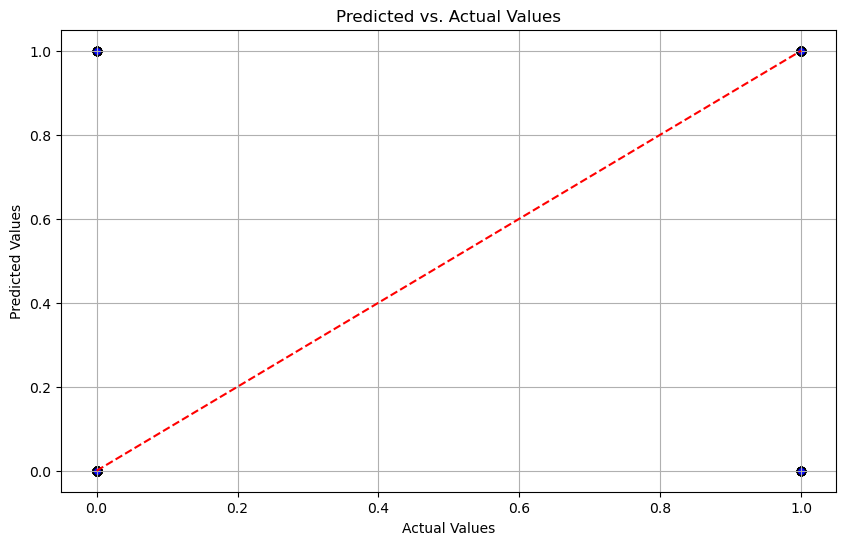

In [15]:
# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(results_df['Actual'], results_df['Predicted'], color='blue', marker='o', edgecolor='k')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line for perfect predictions
plt.title('Predicted vs. Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

In [60]:
from sklearn.svm import SVC

clf=svm.SVC(kernel='linear', C=1)

clf.fit(X_train,Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
max_iter=-1, probability=False, random_state=None, shrinking=True,
tol=0.001, verbose=False)

SVC(decision_function_shape=None, gamma='auto')

In [ ]:
clf.get_params()
clf.fit(X_train,Y_train)

In [62]:
y_pred=clf.predict(X_test)

In [63]:
accuracy= accuracy_score(Y_test,y_pred)
print(f"Accuracy: {accuracy: .2f}")

Accuracy:  0.81
